<a href="https://colab.research.google.com/github/BNLCSISMR/Smoking-Obesity-Project/blob/main/MLP_SmokingTumorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GEOparse



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 278 kB 26.4 MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29065 sha256=0f98d13d20ba2e698499411cc823bcc9a69bcb83b6e91d9b3347aff9d645f63c
  Stored in directory: /root/.cache/pip/wheels/4d/15/e8/fbf3b47444215d9728c20d7b35436b50086aa67c2ad6dcedad
Successfully built GEOparse


In [ ]:
import GEOparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline



gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")


25-Sep-2022 20:30:12 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
25-Sep-2022 20:30:12 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
100%|██████████| 69.4M/69.4M [00:08<00:00, 9.02MB/s]
25-Sep-2022 20:30:21 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
25-Sep-2022 20:30:21 DEBUG downloader - Moving /tmp/tmphqznbrnu to /content/GSE46699_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmphqznbrnu to /content/GSE46699_family.soft.gz
25-Sep-2022 20:30:22 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46

In [ ]:
import pandas as pd
import torch


In [ ]:

print()
print("GSM example:")

for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         print(value[1])
         print(value[2])
         print(value[3])
    #print ("Table data:",)
    #print (gsm.table.head())
    

print()

#print("GPL example:")
#for gpl_name, gpl in gse.gpls.items():
 #   print("Name: ", gpl_name)
  #  print("Metadata:",)
   # for key, value in gpl.metadata.items():
    #    print(" - %s : %s" % (key, ", ".join(value)))
    #print("Table data:",)
    #print(gpl.table.head())
    #break


GSM example:
Name:  GSM1134764
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134765
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134766
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134767
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134768
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134769
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134770
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134771
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134772
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134773
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134774
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134775
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134776
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134777
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134778
Metadata:
tissue: normal
smoking: yes
obese: yes
Name:  GSM

Printing the name, head, and items

Create a merged table of the first gsm table we have. Print the head and test out accessing one column

In [ ]:
mergedTable = gsm.table
entry = mergedTable["VALUE"]

Iterate through all of the tables and add the values column to the end of the mergedTable

In [ ]:
for gsm_name, gsm in gse.gsms.items():
    entry = gsm.table["VALUE"]
    mergedTable.insert(1, gsm_name, value=entry, allow_duplicates=True)
    ##mergedTable = mergedTable.assign(gsm_name = entry)

    ##gsm.table = pd.merge(mergedTable, gsm.table, how = 'inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Print mergedTable

drop the last column as it is a duplicate

In [ ]:
mergedTable = mergedTable.iloc[: , :-1]

Transpose the table to make ID_REF the index

In [ ]:
newMergeTable = mergedTable.transpose()

In [ ]:
newMergeTable = newMergeTable.rename(columns=newMergeTable.iloc[0])
newMergeTable = newMergeTable.iloc[1: , :]

In [ ]:
tissueList = []
tissue_label = []
smokingList = []
smoking_label = []
obesityList = []
obesity_label = []
for gsm_name, gsm in gse.gsms.items():
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         substringOne = 'tumor'
         substringTwo = 'yes'
         substringThree = 'yes'
         
         ##Appending all the values to tissue list if its a tumor or not (tumor = 1 normal = 0)
         if substringOne in value[1]:
           tissueList.append(1)
           tissue_label.append('tumor')
         else:
           tissueList.append(0)
           tissue_label.append('normal')
         
         ##Appending all teh values to the smoking list(smoker=1 non-smoker = 0)
         if substringTwo in value[2]:
           smokingList.append(1)
           smoking_label.append('yes')
         else:
           smokingList.append(0)
           smoking_label.append('no')

        ##Appending all teh values to the obesity list(obese = 1 not obese = 0)
         if substringThree in value[3]:
           obesityList.append(1)
           obesity_label.append('yes')
         else:
           obesityList.append(0)
           obesity_label.append('no')
  
print(tissueList)
print(tissue_label)

print(smokingList)
print(smoking_label)

print(obesityList)
print(obesity_label)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
['normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 

Creating a labels dataframe

In [ ]:
#class_labels = pd.DataFrame()

#class_labels['Tissue'] = tissueList
#class_labels['Smoker'] = smokingList
#class_labels['Obesity'] = obesityList
print(newMergeTable)
#print(class_labels)
newMergeTable.shape

            1007_s_at   1053_at    117_at     121_at 1255_g_at   1294_at  \
GSM1304423  10.465147  5.131448  6.003662  11.353257  3.580513  7.227263   
GSM1304422   10.69537  6.117586  6.233694  11.162211  3.420228  7.583564   
GSM1304421   9.785637  4.844387  5.841087  11.198888  3.461025  7.071538   
GSM1304420  10.023791  6.786107  6.438581   9.745609  3.431811  7.204418   
GSM1134889    8.99498  5.530289  5.672777   9.624678  4.034493  6.979319   
...               ...       ...       ...        ...       ...       ...   
GSM1134768  10.106417  4.827499  5.668851  11.194256   3.47619  7.254072   
GSM1134767  10.735899  6.154403  6.539063  10.490871  3.499183  7.313254   
GSM1134766   9.919435  4.628159  5.636217  11.073223  3.479632  7.034347   
GSM1134765   9.812106  5.776783  6.422235  11.142645  3.524682  7.052937   
GSM1134764  10.654552  5.104113  5.372776  11.908765  3.500414  7.154525   

             1316_at   1320_at 1405_i_at   1431_at  ... AFFX-r2-Ec-bioD-3_at  \
GSM1304

(130, 54675)

Using tree based feature selection to get importance scores

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(newMergeTable, tissueList)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
newMergeTableTwo = model.transform(newMergeTable)


importance_List = []




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


creating a list of all importance scores

In [ ]:
for i,v in enumerate(importances):
	importance_List.append(v)
print(importance_List)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0011666056442175845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007059053507625589, 0.0, 0.0005389718076285241, 0.0, 0.0011566506093869276, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000560554012046549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010957218526205991, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

sorting all the scores descending

In [ ]:
sortedImportance_List = sorted(importance_List, reverse=True)
print(sortedImportance_List)

len(importance_List)


[0.00234660318052879, 0.002338612079321441, 0.002317312427760186, 0.002276531436689947, 0.0022248679398501965, 0.002203710815929227, 0.0021578244264811417, 0.0021246820251795374, 0.002097841486265222, 0.002094363781997046, 0.002061919543007256, 0.0020016100415023363, 0.001972501061267753, 0.00196761899331452, 0.0019658941520223337, 0.001911603125720566, 0.0018972597330806284, 0.0018952854773750306, 0.0018755429203190397, 0.0018693796117024803, 0.0018543196714838515, 0.0018479033404406539, 0.0018374936285384046, 0.0018300716189842004, 0.0018085221345237052, 0.0018054823361622699, 0.001803869740023906, 0.0017965726920950807, 0.0017834201730274708, 0.001773373905570068, 0.0017516989551553568, 0.0017417839790188577, 0.0017351111370739272, 0.0017324093816631129, 0.001726606010944004, 0.0017138679112063413, 0.0017127811236216594, 0.0017057569296375266, 0.0017037566999255724, 0.0016939113954039329, 0.0016899184452678169, 0.0016895116255457405, 0.0016879967602328333, 0.001681442571246426, 0.00

54675

concrete example to help

Gets the index of the sorted features scores and adds them to list

In [ ]:
from sklearn.preprocessing import scale
from sklearn import decomposition
print("FEATURE IMPORTANCES", importance_List)
print("FEATURE IMPORTANCES(SORTED)", sortedImportance_List)
importance_indices = []

for i in sortedImportance_List:
  importance_indices.append(importance_List.index(i))

print("INDICES",importance_indices)

FEATURE IMPORTANCES [0.0, 0.0, 0.0, 0.0, 0.0, 0.0011666056442175845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007059053507625589, 0.0, 0.0005389718076285241, 0.0, 0.0011566506093869276, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000560554012046549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010957218526205991, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Check if the code worked

In [ ]:
print(importance_List[12704])

0.0


In [ ]:
#x = np.array([0])
#for i in range(100):
#  x = np.append(x, i)
#print(x)

[ 0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98 99]


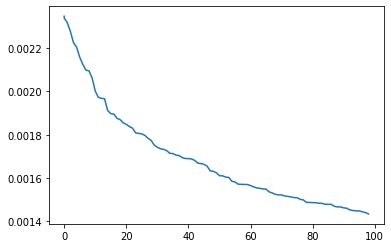

In [ ]:
plt.plot(x[0:100], sortedImportance_List[0:100])
plt.show()

Now time to create a new table of only the most important features

In [ ]:
finalMergeTable = pd.DataFrame()

#number of iterations based on how many features may be changed based on how many create a good PCA plot
for i in range (5):
  targetColumn = newMergeTable.iloc[:,importance_indices[i]]
  finalMergeTable.insert(len(finalMergeTable.columns), i, targetColumn)

print(finalMergeTable)


                   0         1         2         3         4
GSM1304423  5.472512  5.043938  5.783207  4.440468  4.740936
GSM1304422  5.305983  4.771241  5.470658  4.475807  4.340777
GSM1304421   5.70149  5.314228  5.564808  4.625389   4.75495
GSM1304420   5.41686  4.707445  5.012932   4.46275   3.96882
GSM1134889  4.334629  5.729002  5.324382  4.159332  4.911869
...              ...       ...       ...       ...       ...
GSM1134768  5.256373  5.872004  5.912137   4.17837  5.245849
GSM1134767  5.409812  5.962504  5.519567  4.321638  4.985443
GSM1134766   5.48568  6.418544  5.885216  4.673655  5.324707
GSM1134765  5.609231  6.171698  5.617982  4.442982  4.832895
GSM1134764  5.406184  6.559831  5.992551  4.382534  4.741357

[130 rows x 5 columns]


In [ ]:
pca = decomposition.PCA(n_components=4)
pca.fit(finalMergeTable)



PCA(n_components=4)

In [ ]:
scores = pca.transform(finalMergeTable)

In [ ]:
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
scores_df

,PC1,PC2,PC3,PC4
0,-0.347720,0.309486,-0.020576,-0.006695
1,-0.807004,-0.052667,0.013342,-0.080479
2,-0.131909,0.257240,-0.115371,-0.372964
3,-1.097431,-0.409607,-0.007837,-0.470591
4,0.315739,-0.752864,0.488464,0.493894
...,...,...,...,...
125,0.628309,0.186568,0.076923,0.196469
126,0.535281,-0.084623,-0.012619,-0.215153
127,1.136296,0.221897,-0.253682,-0.114659
128,0.636792,-0.057731,-0.333036,-0.346450


In [ ]:
import plotly.express as px

In [ ]:
# Label to color dict (manual)
label_color_dict_tissue = {'tumor':'red','normal':'green'}
label_color_dict_obesity = {'yes': 'red', 'no': 'green'}
label_color_dict_smoker = {'yes': 'red', 'no': 'green'}

# Color vector creation
cvec_tissue = [label_color_dict_tissue[label] for label in tissue_label]
cvec_obesity = [label_color_dict_obesity[label] for label in obesity_label]
cvec_smoker = [label_color_dict_smoker[label] for label in smoking_label]

shape_tissue = []
for i in cvec_tissue:
  if(i=='green'):
    shape_tissue.append('normal')
  else:
    shape_tissue.append('tumor')

new_shape_tissue=pd.DataFrame()
new_shape_tissue['marker'] = shape_tissue

In [ ]:
print(cvec_tissue)
print(shape_tissue)
print(new_shape_tissue)

['green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'red', 'r

In [ ]:
#plt.figure(figsize=(8,8))
#for marker in shape_tissue:
#  plt.scatter(scores[:,0], scores[:,2],
#              c=cvec_tissue, edgecolor='', alpha=0.5, marker = marker)
#plt.xlabel('PC 1')
#plt.ylabel('PC 3')
#plt.show()

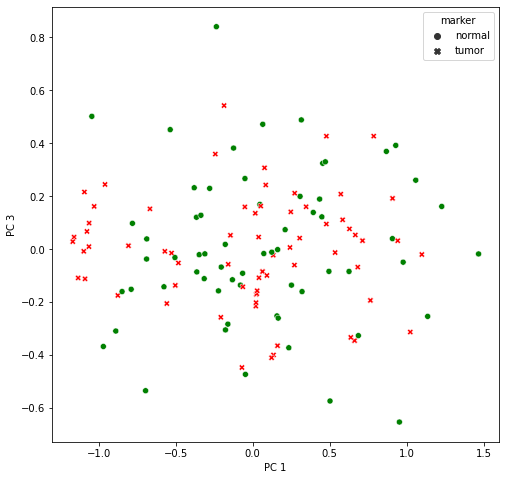

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.scatterplot(x=scores[:,0], y=scores[:,2], c=cvec_tissue, style=new_shape_tissue['marker'])
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.show()

logsitic regression is sensitive to noise we chooose most important features so it can handle and make it more linearly separable

ensemble method (XGBoost):

https://www.nvidia.com/en-us/glossary/data-science/xgboost/
https://en.wikipedia.org/wiki/Gradient_boosting
multi perceptron data good at handling non-linear data but requires more training data

EXPLAIN EVERYTHING in simple but detailed way

Target Word Count: --> five pages (maybe even 10 pages)

SPLIT INTO TRAIN VALID AND TEST if test too small then use cross-validation https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

finalMergeTable['Smoker'] = smokingList
finalMergeTable['Obesity'] = obesityList

final_normalized = sc.fit_transform(finalMergeTable)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
finalMergeTable['Tissue'] = tissueList
finalMergeTable

,0,1,2,3,4,Smoker,Obesity,Tissue
GSM1304423,5.472512,5.043938,5.783207,4.440468,4.740936,0,0,0
GSM1304422,5.305983,4.771241,5.470658,4.475807,4.340777,0,0,1
GSM1304421,5.70149,5.314228,5.564808,4.625389,4.75495,1,0,0
GSM1304420,5.41686,4.707445,5.012932,4.46275,3.96882,1,0,1
GSM1134889,4.334629,5.729002,5.324382,4.159332,4.911869,0,0,0
...,...,...,...,...,...,...,...,...
GSM1134768,5.256373,5.872004,5.912137,4.17837,5.245849,0,0,1
GSM1134767,5.409812,5.962504,5.519567,4.321638,4.985443,0,0,1
GSM1134766,5.48568,6.418544,5.885216,4.673655,5.324707,0,0,0
GSM1134765,5.609231,6.171698,5.617982,4.442982,4.832895,0,0,1


In [ ]:
#trying to make the objects into floats
finalMergeTable.iloc[:, 0] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 1] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 2] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 3] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 4] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable['Smoker'] = finalMergeTable['Smoker'].astype(float, errors = 'raise')
finalMergeTable['Obesity'] = finalMergeTable['Obesity'].astype(float, errors = 'raise')
finalMergeTable['Tissue'] = finalMergeTable['Tissue'].astype(float, errors = 'raise')

finalMergeTable.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
Smoker     float64
Obesity    float64
Tissue     float64
dtype: object

In [ ]:
finalMergeTable

,0,1,2,3,4,Smoker,Obesity,Tissue
GSM1304423,5.472512,5.472512,5.472512,5.472512,5.472512,0.0,0.0,0.0
GSM1304422,5.305983,5.305983,5.305983,5.305983,5.305983,0.0,0.0,1.0
GSM1304421,5.701490,5.701490,5.701490,5.701490,5.701490,1.0,0.0,0.0
GSM1304420,5.416860,5.416860,5.416860,5.416860,5.416860,1.0,0.0,1.0
GSM1134889,4.334629,4.334629,4.334629,4.334629,4.334629,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
GSM1134768,5.256373,5.256373,5.256373,5.256373,5.256373,0.0,0.0,1.0
GSM1134767,5.409812,5.409812,5.409812,5.409812,5.409812,0.0,0.0,1.0
GSM1134766,5.485680,5.485680,5.485680,5.485680,5.485680,0.0,0.0,0.0
GSM1134765,5.609231,5.609231,5.609231,5.609231,5.609231,0.0,0.0,1.0


In [ ]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
from sklearn. model_selection import train_test_split

var_colums = [c for c in finalMergeTable.columns if c not in ['Tissue']]
X = finalMergeTable.loc[:, var_colums]
y = finalMergeTable.loc[:, 'Tissue']

print(X)
print(y)


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

                   0         1         2         3         4  Smoker  Obesity
GSM1304423  5.472512  5.472512  5.472512  5.472512  5.472512     0.0      0.0
GSM1304422  5.305983  5.305983  5.305983  5.305983  5.305983     0.0      0.0
GSM1304421  5.701490  5.701490  5.701490  5.701490  5.701490     1.0      0.0
GSM1304420  5.416860  5.416860  5.416860  5.416860  5.416860     1.0      0.0
GSM1134889  4.334629  4.334629  4.334629  4.334629  4.334629     0.0      0.0
...              ...       ...       ...       ...       ...     ...      ...
GSM1134768  5.256373  5.256373  5.256373  5.256373  5.256373     0.0      0.0
GSM1134767  5.409812  5.409812  5.409812  5.409812  5.409812     0.0      0.0
GSM1134766  5.485680  5.485680  5.485680  5.485680  5.485680     0.0      0.0
GSM1134765  5.609231  5.609231  5.609231  5.609231  5.609231     0.0      0.0
GSM1134764  5.406184  5.406184  5.406184  5.406184  5.406184     0.0      0.0

[130 rows x 7 columns]
GSM1304423    0.0
GSM1304422    1.0
GSM1

In [ ]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5), 
                    max_iter = 300,
                    random_state=5,
                    verbose=True,
                    early_stopping = False,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)

Iteration 1, loss = 0.92840513
Iteration 2, loss = 0.85293616
Iteration 3, loss = 0.78725191
Iteration 4, loss = 0.73694484
Iteration 5, loss = 0.71146778
Iteration 6, loss = 0.69956797
Iteration 7, loss = 0.69745295
Iteration 8, loss = 0.69684720
Iteration 9, loss = 0.69536357
Iteration 10, loss = 0.69431417
Iteration 11, loss = 0.69364978
Iteration 12, loss = 0.69326973
Iteration 13, loss = 0.69315271
Iteration 14, loss = 0.69322592
Iteration 15, loss = 0.69343200
Iteration 16, loss = 0.69371761
Iteration 17, loss = 0.69403537
Iteration 18, loss = 0.69434556
Iteration 19, loss = 0.69461735
Iteration 20, loss = 0.69483901
Iteration 21, loss = 0.69496890
Iteration 22, loss = 0.69503205
Iteration 23, loss = 0.69502129
Iteration 24, loss = 0.69494449
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01, max_iter=300,
              random_state=5, verbose=True)

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_valid)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_valid,ypred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.5769230769230769